## NYC KPI DA

LIST OF KPIs
* KPI1 - vehicle hours reduction ($\Delta T_v$)
* KPI2 - travellers utility gains ($\Delta U_p$)
* KPI3 - share of pooling (shared ratio, $S$)
* KPI4 - occupancy ($O$)
* KPI5 - passenger hours increase (pooling detour, $\Delta T_p$)

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','no-latex'])

In [2]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [3]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [4]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

In [5]:
df['del_VehHourTrav']=abs(df['VehHourTrav']-df['VehHourTrav_ns'])/df['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df['del_PassUtility']=abs((df['PassUtility']-df['PassUtility_ns'])/df['PassUtility_ns'])      # KPI2: travellers utility gains
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']                                       # KPI4: occupancy
df['del_PassHourTrav']=abs((df['PassHourTrav']-df['PassHourTrav_ns'])/df['PassHourTrav_ns'])  # KPI5: passenger hours increase

In [6]:
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2

> **THE CRITICAL MASS**

C:\Users\shuli\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shuli\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shuli\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shuli\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shuli\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


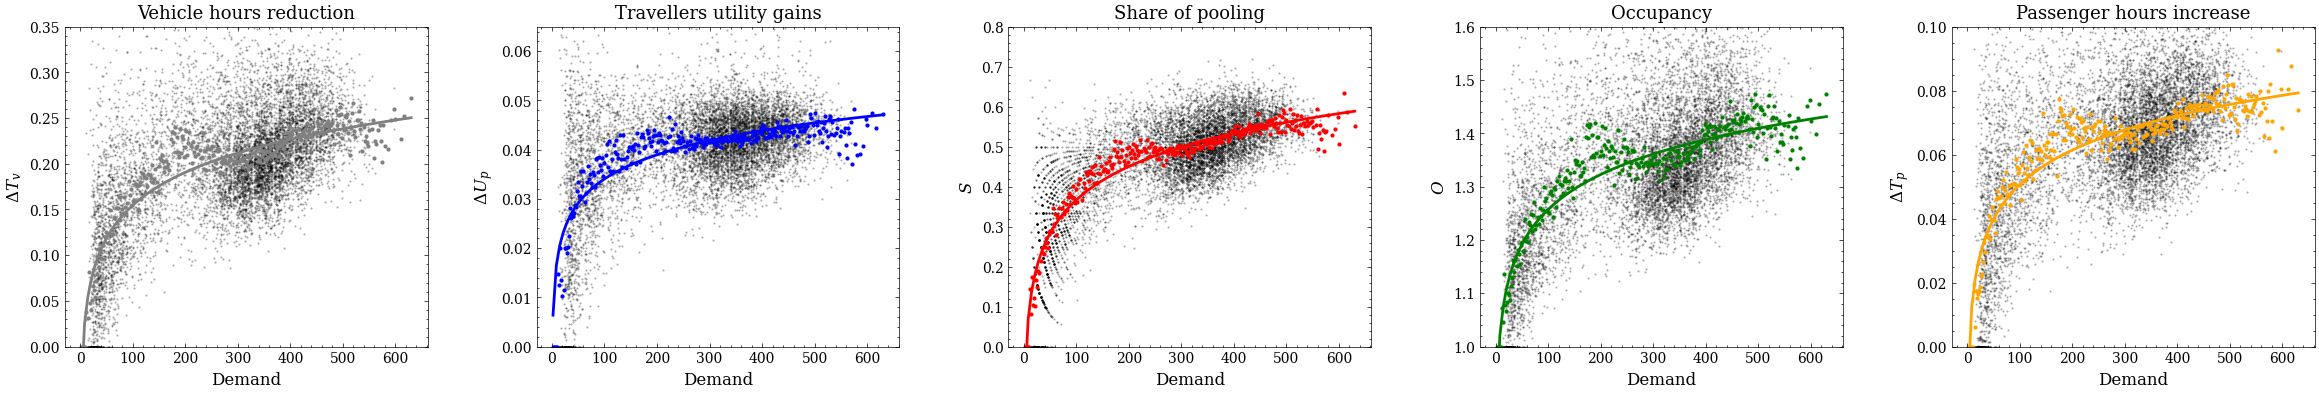

In [7]:
import numpy as np
from scipy.optimize import curve_fit

def plot_log_fit(x,y,ax, color = 'black'):
    popt, pcov = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x,y )
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.log(b * x_fitted) + c
    ax.plot(x_fitted, y_fitted, lw = 2, color = color)

fig, axes = plt.subplots(1,5, figsize = (25,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, ax = ax, 
            line_kws = {'lw':0}, ci =None)
plot_log_fit(to_plot.Trips, to_plot.del_VehHourTrav, ax, 'grey')
to_plot = df.groupby(df.Trips).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='grey', marker = 'o')
ax.set_ylim((0,0.35))
ax.set_ylabel("$\Delta T_v$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Vehicle hours reduction", fontsize=13, fontweight='normal')

ax=axes[1]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, ax = ax, 
            line_kws = {'lw':0}, ci = None)
plot_log_fit(to_plot.Trips, to_plot.del_PassUtility, ax, 'blue')
to_plot = df.groupby(df.Trips).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
ax.set_ylim((0,0.065))
ax.set_ylabel("$\Delta U_p$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Travellers utility gains", fontsize=13, fontweight='normal')

ax=axes[2]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, ax = ax, 
            line_kws = {'lw':0}, ci = None)
plot_log_fit(to_plot.Trips, to_plot.shared_ratio, ax, 'red')
to_plot = df.groupby(df.Trips).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Share of pooling", fontsize=13, fontweight='normal')

ax=axes[3]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, ax = ax, 
            line_kws = {'lw':0}, ci = None)
plot_log_fit(to_plot.Trips, to_plot.Occupancy, ax, 'green')
to_plot = df.groupby(df.Trips).Occupancy.mean()
#to_plot.plot.scatter(ax = ax, s = 3, color = 'orange')
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Occupancy", fontsize=13, fontweight='normal')

ax=axes[4]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, ax = ax, 
            line_kws = {'lw':0},ci = None)
plot_log_fit(to_plot.Trips, to_plot.del_PassHourTrav, ax, 'orange')
to_plot = df.groupby(df.Trips).del_PassHourTrav.mean()
#to_plot.plot.scatter(ax = ax, s = 3, color = 'orange')
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='orange', marker = 'o')
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Passenger hours increase", fontsize=13, fontweight='normal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.25)
# plt.savefig('F3.jpg', dpi=300)

> **KPI DISTRIBUTION**

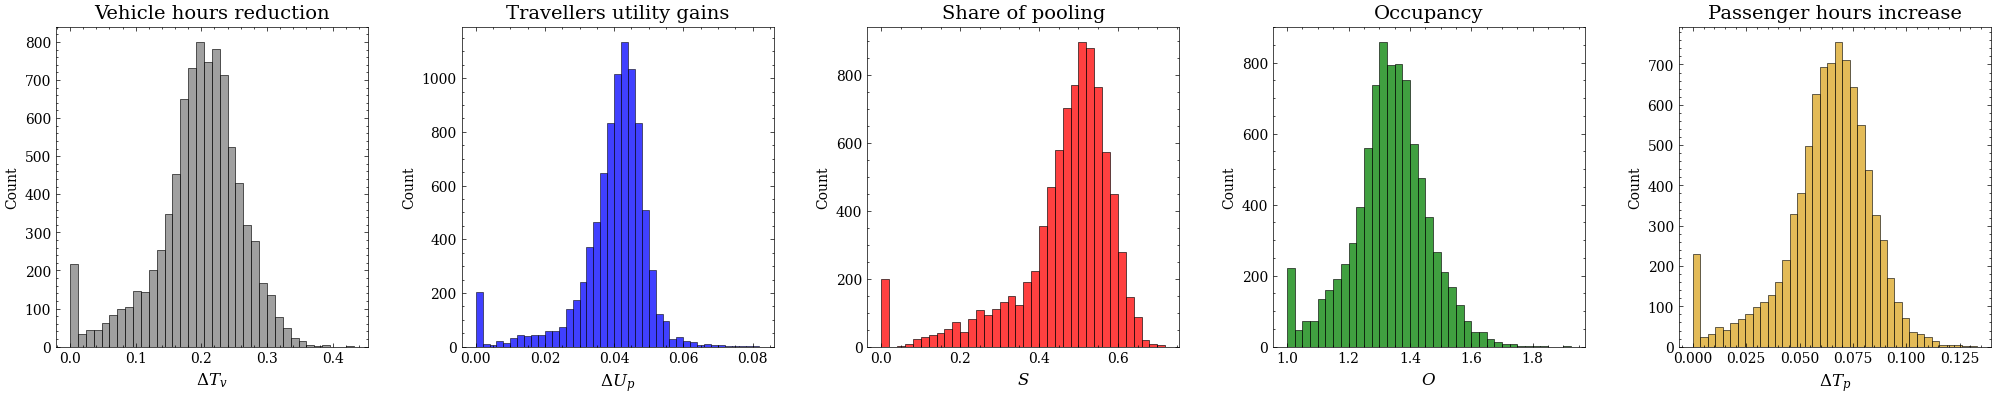

In [48]:
fig = plt.figure(figsize=(18, 4))

ax1 = plt.subplot2grid((1,5), (0,0)) 
ax2 = plt.subplot2grid((1,5), (0,1)) 
ax3 = plt.subplot2grid((1,5), (0,2)) 
ax4 = plt.subplot2grid((1,5), (0,3)) 
ax5 = plt.subplot2grid((1,5), (0,4)) 

ax=ax1
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_VehHourTrav', color='grey', ax=ax, binwidth=0.012)
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel("$\Delta T_v$", fontsize=12)
ax1.set_title("Vehicle hours reduction", fontsize=14, fontweight='normal')

ax=ax2 
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_PassUtility', color='blue', ax=ax, binwidth=0.002)
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel("$\Delta U_p$", fontsize=12)
ax2.set_title("Travellers utility gains", fontsize=14, fontweight='normal')

ax=ax3 
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.02)
to_plot.Start_time.dt.dayofweek.unique()
ax3.set_xlabel("$S$", fontsize=12)
ax3.set_title("Share of pooling", fontsize=14, fontweight='normal')

ax=ax4 
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'Occupancy', color='green', ax=ax, binwidth=0.025)
to_plot.Start_time.dt.dayofweek.unique()
ax4.set_xlabel("$O$", fontsize=12)
ax4.set_title("Occupancy", fontsize=14, fontweight='normal')

ax=ax5 
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_PassHourTrav', color='goldenrod', ax=ax, binwidth=0.0035)
to_plot.Start_time.dt.dayofweek.unique()
ax5.set_xlabel("$\Delta T_p$", fontsize=12)
ax5.set_title("Passenger hours increase", fontsize=14, fontweight='normal')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.25)
# plt.savefig('F4.jpg', dpi=300)

> **KPI with standard deviation depending on time of a day**

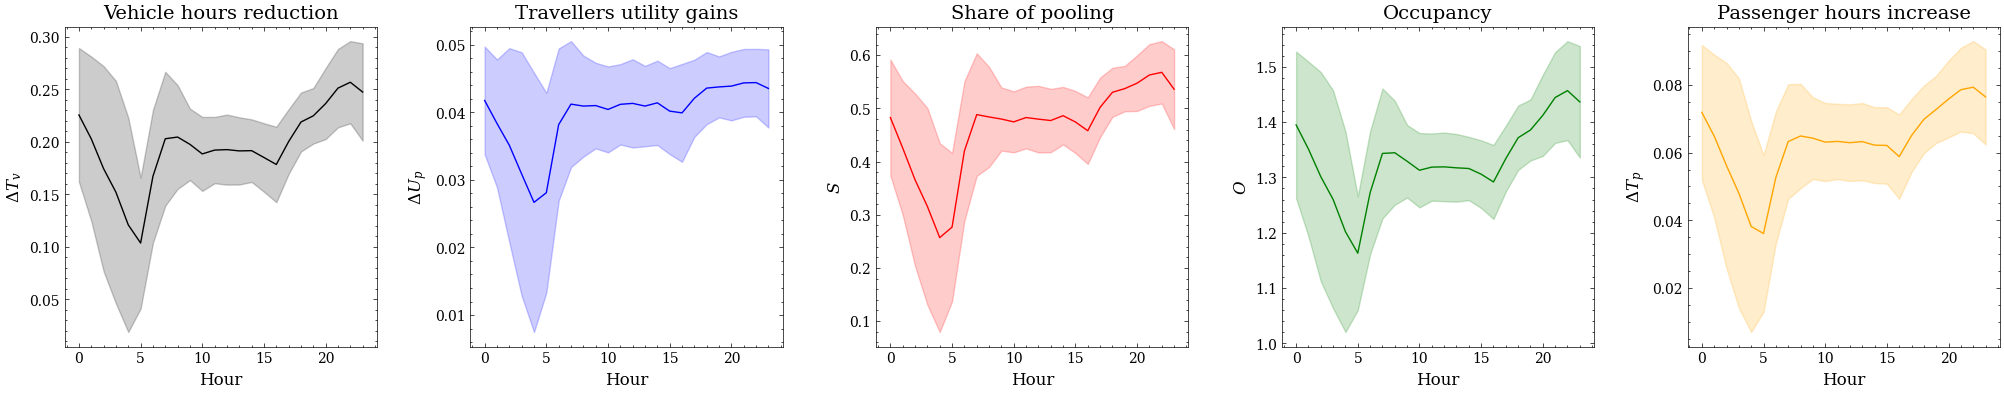

In [9]:
fig = plt.figure(figsize=(18, 4))
ax1 = plt.subplot2grid((1,5), (0,0)) # Vehicle hours reduction with standard deviation
ax2 = plt.subplot2grid((1,5), (0,1)) # Travellers utility gains with standard deviation
ax3 = plt.subplot2grid((1,5), (0,2)) # Share of pooling with standard deviation
ax4 = plt.subplot2grid((1,5), (0,3)) # Occupancy with standard deviation
ax5 = plt.subplot2grid((1,5), (0,4)) # Passenger hours increase with standard deviation


ax=ax1
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_VehHourTrav', 
                 ax = ax, color='black', errorbar ='sd')
ax1.set_xlabel('Hour', fontsize=12)
ax1.set_ylabel("$\Delta T_v$", fontsize=12)
ax1.set_title("Vehicle hours reduction", fontsize=14, fontweight='normal')

ax=ax2
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassUtility', 
                 ax = ax, color='blue', errorbar ='sd')
ax2.set_xlabel('Hour', fontsize=12)
ax2.set_ylabel("$\Delta U_p$", fontsize=12)
ax2.set_title("Travellers utility gains", fontsize=14, fontweight='normal')

ax=ax3
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'shared_ratio', 
                 ax = ax, color='red', errorbar ='sd')
ax3.set_xlabel('Hour', fontsize=12)
ax3.set_ylabel("$S$", fontsize=12)
ax3.set_title("Share of pooling", fontsize=14, fontweight='normal')

ax=ax4
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'Occupancy', 
                 ax = ax, color='green', errorbar ='sd')
ax4.set_xlabel('Hour', fontsize=12)
ax4.set_ylabel("$O$", fontsize=12)
ax4.set_title("Occupancy", fontsize=14, fontweight='normal')

ax=ax5
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassHourTrav', 
                 ax = ax, color='orange', errorbar ='sd')
ax5.set_xlabel('Hour', fontsize=12)
ax5.set_ylabel("$\Delta T_p$", fontsize=12)
ax5.set_title("Passenger hours increase", fontsize=14, fontweight='normal')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.25)
# plt.savefig('F5.jpg', dpi=300)

> **Sensitivity of KPI to weekends/working days at different times of the day** 


      using the Vehicle Hours Reduction indicator as an example

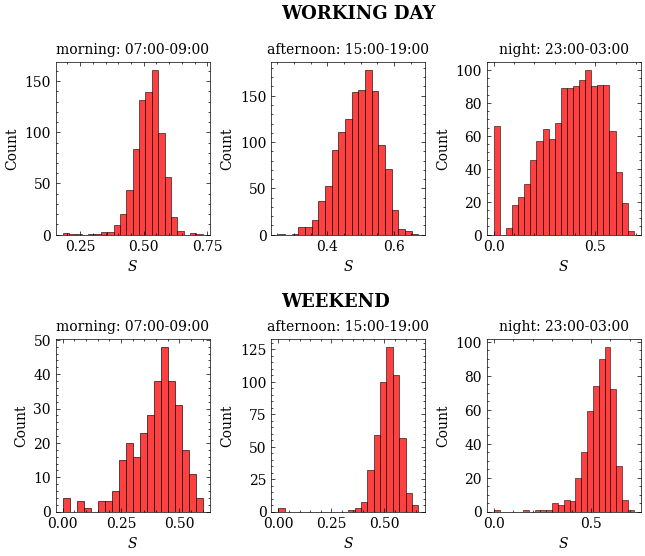

In [30]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((2,3), (0,0)) 
ax2 = plt.subplot2grid((2,3), (0,1)) 
ax3 = plt.subplot2grid((2,3), (0,2)) 
ax4 = plt.subplot2grid((2,3), (1,0)) 
ax5 = plt.subplot2grid((2,3), (1,1)) 
ax6 = plt.subplot2grid((2,3), (1,2)) 

ax=ax1 
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.025)
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel("$S$")
ax1.set_title("morning: 07:00-09:00", fontsize=10)

ax=ax2 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([15,16,17,18,19])))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.02)
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel("$S$")
ax2.set_title("afternoon: 15:00-19:00", fontsize=10)

ax=ax3 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([23]))) 
                 | df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([0,1,2,3]))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.03)
to_plot.Start_time.dt.dayofweek.unique()
ax3.set_xlabel("$S$")
ax3.set_title("night: 23:00-03:00", fontsize=10)

ax=ax4 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.03)
to_plot.Start_time.dt.dayofweek.unique()
ax4.set_xlabel("$S$")
ax4.set_title("morning: 07:00-09:00", fontsize=10)

ax=ax5 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([15,16,17,18,19])))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.03)
to_plot.Start_time.dt.dayofweek.unique()
ax5.set_xlabel("$S$")
ax5.set_title("afternoon: 15:00-19:00", fontsize=10)

ax=ax6 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([23]))) 
                 | df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([0,1,2,3]))]
sns.histplot(data = to_plot, x = 'shared_ratio', color='red', ax=ax, binwidth=0.03)
to_plot.Start_time.dt.dayofweek.unique()
ax6.set_xlabel("$S$")
ax6.set_title("night: 23:00-03:00", fontsize=10)

plt.suptitle('WORKING DAY', ha='left', va='center', fontsize=13, fontweight='bold')
plt.figtext(0.5, 0.5, 'WEEKEND', ha='left', va='center', fontsize=13, fontweight='bold')
plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=1.1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
# plt.savefig('F7.jpg', dpi=300)

> **Sensitivity of KPI to discount** 


      using the OCCUPANCY indicator as an example (the discount levels for ride-pooling are 0.2, 0.24, 0.28)

In [11]:
df1 = pd.read_csv('df.csv', index_col=0)

In [12]:
df1.Start_time = df1.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [13]:
df1.Start_time = pd.to_datetime(df1.Start_time)
df1.End_time = pd.to_datetime(df1.End_time)

In [14]:
df1['del_VehHourTrav']=(df1['VehHourTrav_ns']-df1['VehHourTrav'])/df1['VehHourTrav'] #KPI1: vehicle hours reduction
df1['del_PassUtility']=abs((df1['PassUtility_ns']-df1['PassUtility'])/df1['PassUtility']) #KPI2:travellers utility gains
df1['Occupancy']=df1['PassHourTrav']/df1['VehHourTrav'] #KPI4:occupancy
df1['del_PassHourTrav']=abs((df1['PassHourTrav_ns']-df1['PassHourTrav'])/df1['PassHourTrav']) #KPI5:passenger hours increase

In [15]:
df1['hour'] = df1.Start_time.dt.hour
df['hour'] = df.Start_time.dt.hour

In [16]:
from cycler import cycler

Text(0.5, 0, '$O$')

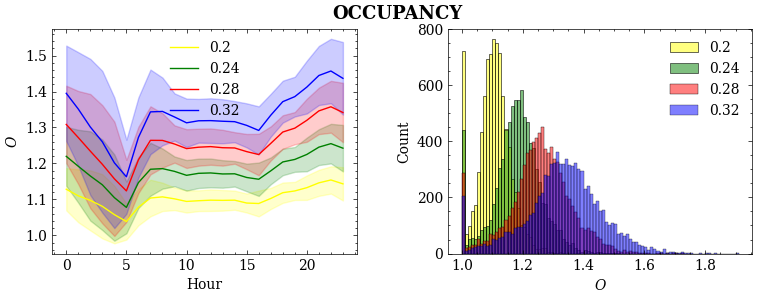

In [32]:
fig, axes = plt.subplots(1,2, figsize = (7,3))
axes = axes.flatten()

plt.suptitle('OCCUPANCY', x=0.5, y=0.95, ha='left', va='center', fontsize=13, fontweight='bold') # Occupancy with standard deviation. Working day
plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=1.1, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.45)

ax=axes[0]
to_plot = df1[(df1.shared_discount == 0.2)]
sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', label = '0.2', 
                 ax = ax, color='yellow', errorbar ='sd', linewidth=1.0)
to_plot = df1[(df1.shared_discount == 0.24)]
sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', label = '0.24', 
                 ax = ax, color='green', errorbar ='sd', linewidth=1.0)
to_plot = df1[(df1.shared_discount == 0.28)]
sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', label = '0.28', 
                 ax = ax, color='red', errorbar ='sd', linewidth=1.0)
to_plot = df[(df.shared_discount == 0.32)]
sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', label = '0.32', 
                 ax = ax, color='blue', errorbar ='sd', linewidth=1.0)
ax.set_ylabel("$O$", fontsize=10)
ax.set_xlabel("Hour", fontsize=10)
ax.legend(loc='upper center')

ax=axes[1]
to_plot = df1[(df1.shared_discount == 0.2)]
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',
             palette=['yellow'], label = '0.2',ax = ax, binwidth=0.01)
to_plot = df1[(df1.shared_discount == 0.24)]
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount', 
             palette=['green'], label = '0.24',ax = ax, binwidth=0.01)
to_plot = df1[(df1.shared_discount == 0.28)]
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount', 
             palette=['red'], label = '0.28', ax = ax, binwidth=0.01)
to_plot = df[(df.shared_discount == 0.32)]
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount', 
             palette=['blue'], label = '0.32', ax = ax, binwidth=0.01)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(('0.2', '0.24', '0.28', '0.32'), loc='upper right')
ax.set_xlabel("$O$", fontsize=10)

# plt.savefig('F8.jpg', dpi=300)